In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
df=pd.read_csv("/content/diabetes_dataset.csv")

# **Checkingfor Null values**

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Cleaning the data**

In [ ]:
df1=df.drop(['Pregnancies'],axis='columns')

In [ ]:
data={
    'column_name':['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
}

# **Removal of Outliers using Z-Score**

In [ ]:
def eliminate_outliers(df, column_name, threshold=3):
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    df_filtered = df[z_scores <= threshold]
    return df_filtered

In [ ]:
df2=eliminate_outliers(df1,'Glucose')

In [ ]:
df3=eliminate_outliers(df2,'BloodPressure')

In [ ]:
df4=eliminate_outliers(df3,'SkinThickness')

In [ ]:
df5=eliminate_outliers(df4,'Insulin')

In [ ]:
df6=eliminate_outliers(df5,'BMI')

In [ ]:
df7=eliminate_outliers(df6,'DiabetesPedigreeFunction')

In [ ]:
df8=eliminate_outliers(df7,'Age')

In [ ]:
df8

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


# **Splitting the data into training,testing and validation datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df8['Outcome']

In [ ]:
X=df8.drop(['Outcome'],axis='columns')

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **Using Cross-Validation and hyperparameter tuning to find the best model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import RandomSearchCV,Kfold
from sklearn.model_selection import cross_val_score
def best_model(X,y):
  models={
       'logistic_regression' : {
            'model':LogisticRegression(),
            'params': {
                'fit_intercept': [True, False],
                'penalty':['none','l1','l2'],
                'max_iter':[200],
                'dual':[True,False],
                'multi_class':['ovr','multinomial','auto'],
                'fit_intercept':[True,False],
                'verbose':[100],
                'random_state':[100,42],
            }
        },
       'Decision_Tree_Classifier':{
           'model':DecisionTreeClassifier(),
          'params':{
              'criterion':['entropy','gini','mse'],
              'splitter':['random','best'],
              'random_state':[42],
              'max_depth':[None,3,5,7,10],
              'min_samples_split':[100,42],
              'max_features':['log2','auto','sqrt','log2','None']
          }
       },
       'Random_Forest_Classifier':{
          'model':RandomForestClassifier(),
          'params':{
              'n_estimators':[10,50,100],
              'criterion':['entropy','gini','mse'],
               'max_depth':[None,3,5,7,100],
              'max_features':['log2','auto','sqrt','log2','None'],
              'bootstrap':[True,False],
              'random_state':[42],
              'min_samples_split':[100,2,5,10]
          }
       },
       'Support_Vector_Machine_Classifier':{
          'model':SVC(),
          'params':{
              'kernel':['linear','rbf','sigmoid'],
              'degree':[2,3,4],
              'probability':[True,False],
              'class_weight':['balanced','None'],
              'shrinking':[True,False],
              'C':[0.01, 0.1, 1, 10, 100],
              'gamma':[0.1, 0.01, 0.001]
          }
       }
  }
  scores=[]
  cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
  for model_name, config in models.items():
        rsc =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=True)
        rsc.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score': rsc.best_score_,
            'best_params': rsc.best_params_
        })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model(X,y)

# **Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression(penalty='none',max_iter=200,dual=False,multi_class='multinomial',fit_intercept=True,verbose=100,random_state=100)

In [ ]:
logreg_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', penalty='none',
                   random_state=100, verbose=100)

In [ ]:
y_test_pred = logreg_model.predict(X_test)

In [ ]:
y_val_pred = logreg_model.predict(X_val)

In [ ]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", val_accuracy)

Accuracy: 0.7864077669902912


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8252427184466019


In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8


In [ ]:
F1_Score = f1_score(y_test, y_pred)
print("F1_Score:",F1_Score)

F1_Score: 0.689655172413793


In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.6060606060606061


# **Creating a Confusion matrix for Logistic Regression**

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

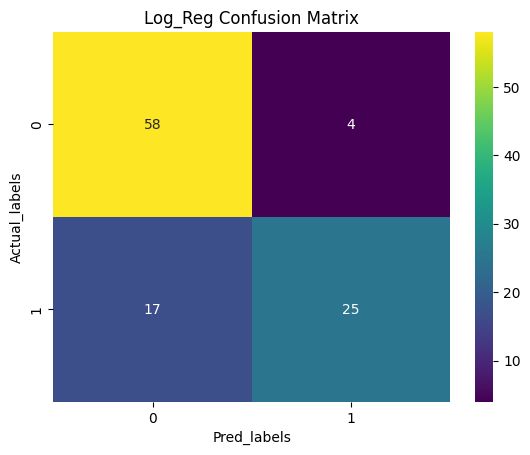

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=True, xticklabels=True, yticklabels=True)
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Log_Reg Confusion Matrix")
plt.show()

# **Calculating AUC and plotting the ROC curve**

In [ ]:
fpr, tpr,_ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

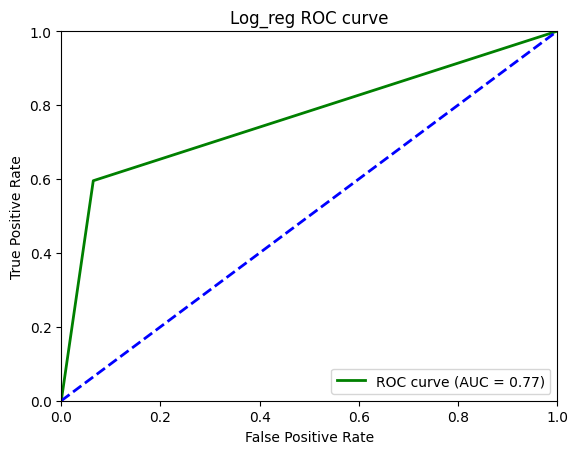

In [ ]:
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log_reg ROC curve')
plt.legend(loc="lower right")
plt.show()

# **Using Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree_model=DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=42,max_depth=None,min_samples_split=100,max_features='log2')

In [ ]:
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=100, random_state=42,
                       splitter='random')

In [ ]:
y_pred_dec = dec_tree_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dec)
print("Accuracy:", accuracy)

Accuracy: 0.7961165048543689


In [ ]:
precision = precision_score(y_test, y_pred_dec)
print("Precision:", precision)

Precision: 0.6875


In [ ]:
F1_Score = f1_score(y_test, y_pred_dec)
print("F1_Score:",F1_Score)

F1_Score: 0.676923076923077


In [ ]:
recall = recall_score(y_test, y_pred_dec)
print("Recall:", recall)

Recall: 0.6666666666666666


# **Creating a Confusion Matrix for Decision Tree classifier**

In [ ]:
cm_dec = confusion_matrix(y_test,y_pred_dec)

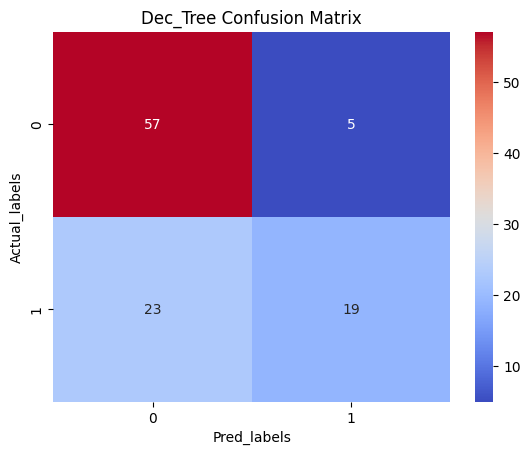

In [ ]:
sns.heatmap(cm_dec, annot=True, fmt="d", cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True,linecolor="blue")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Dec_Tree Confusion Matrix")
plt.show()

# **Calculating AUC and plotting the ROC curve**

In [ ]:
fpr, tpr,_ = roc_curve(y_test, y_pred_dec)
roc_auc = auc(fpr, tpr)

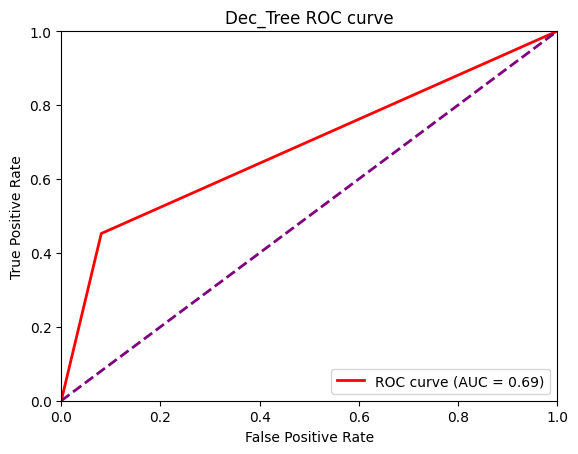

In [ ]:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dec_Tree ROC curve')
plt.legend(loc="lower right")
plt.show()

# **Using Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=100,max_features='log2',bootstrap=True,random_state=42,min_samples_split=50)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='log2',
                       min_samples_split=50, n_estimators=50, random_state=42)

In [ ]:
y_pred_rf=rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.7961165048543689


In [ ]:
precision = precision_score(y_test, y_pred_rf)
print("Precision:", precision)

Precision: 0.7142857142857143


In [ ]:
F1_Score = f1_score(y_test, y_pred_rf)
print("F1_Score:",F1_Score)

F1_Score: 0.6557377049180327


In [ ]:
recall = recall_score(y_test, y_pred_rf)
print("Recall:", recall)

Recall: 0.6060606060606061


# **Creating a Confusion Matrix for Random Forest classifier**

In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_rf)

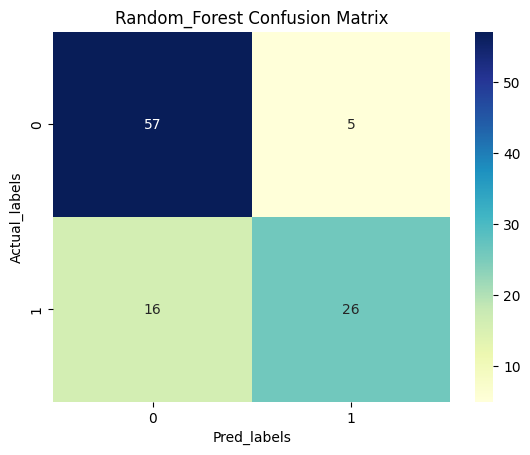

In [ ]:
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True,linecolor="green")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Random_Forest Confusion Matrix")
plt.show()

# **Calculating AUC and plotting the ROC curve**

In [ ]:
fpr, tpr,_ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

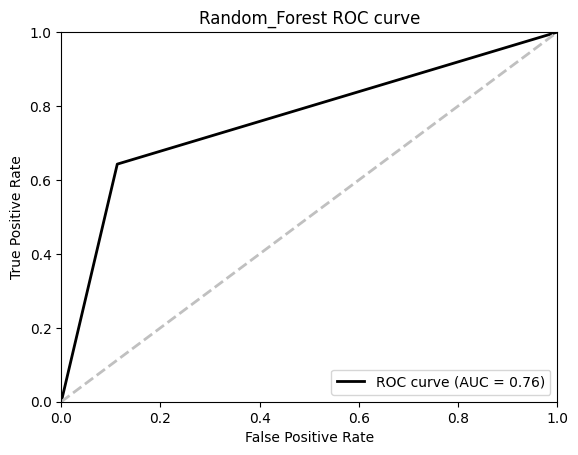

In [ ]:
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='silver', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random_Forest ROC curve')
plt.legend(loc="lower right")
plt.show()

# **Using Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC(kernel='linear',degree=3,probability=True,class_weight='balanced',shrinking=True)

In [ ]:
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [ ]:
y_pred_svc=svc_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

Accuracy: 0.7864077669902912


In [ ]:
precision = precision_score(y_test, y_pred_svc)
print("Precision:", precision)

Precision: 0.6486486486486487


In [ ]:
F1_Score = f1_score(y_test, y_pred_svc)
print("F1_Score:",F1_Score)

F1_Score: 0.6857142857142857


In [ ]:
recall = recall_score(y_test, y_pred_svc)
print("Recall:", recall)

Recall: 0.7272727272727273


# **Creating a Confusion Matrix for Support Vector Machine classifier**

In [ ]:
cm_svc = confusion_matrix(y_test,y_pred_svc)

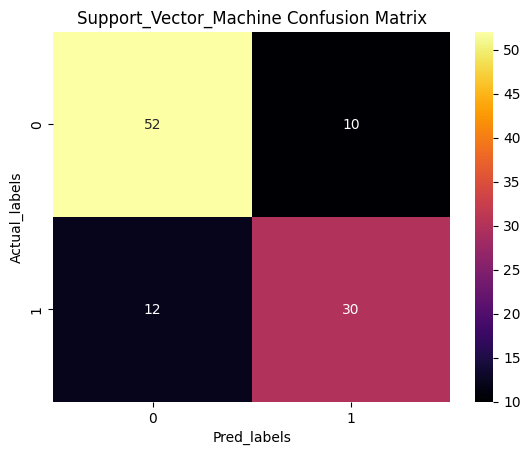

In [ ]:
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="inferno", cbar=True, xticklabels=True, yticklabels=True,linecolor="black")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Support_Vector_Machine Confusion Matrix")
plt.show()

# **Calculating AUC and plotting the ROC curve**

In [ ]:
fpr, tpr,_ = roc_curve(y_test, y_pred_svc)
roc_auc = auc(fpr, tpr)

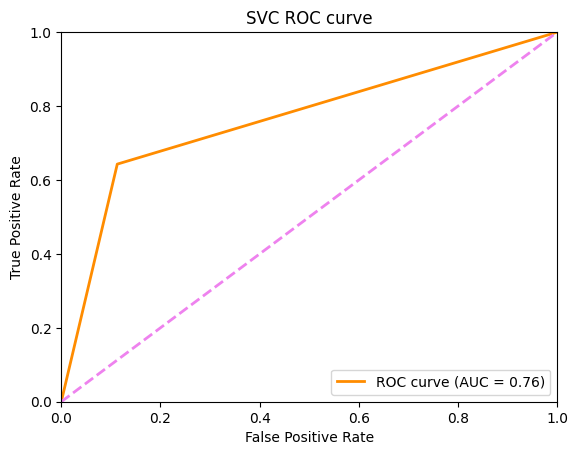

In [ ]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='violet', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC curve')
plt.legend(loc="lower right")
plt.show()

# **Using Naive Bayes Classifier algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()

In [ ]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb=nb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.8058252427184466


In [ ]:
precision = precision_score(y_test, y_pred_nb)
print("Precision:", precision)

Precision: 0.7241379310344828


In [ ]:
F1_Score = f1_score(y_test, y_pred_nb)
print("F1_Score:",F1_Score)

F1_Score: 0.6774193548387097


In [ ]:
recall = recall_score(y_test, y_pred_nb)
print("Recall:", recall)

Recall: 0.6363636363636364


# **Creating a Confusion Matrix for Naive Bayes classifier**

In [ ]:
cm_nb = confusion_matrix(y_test,y_pred_nb)

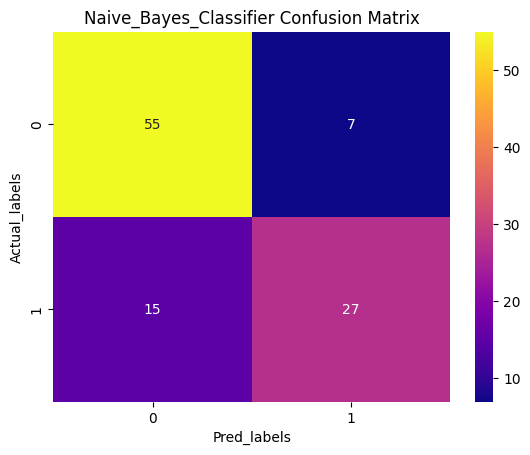

In [ ]:
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="plasma", cbar=True, xticklabels=True, yticklabels=True,linecolor="magenta")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Naive_Bayes_Classifier Confusion Matrix")
plt.show()

# **Calculating AUC and plotting the ROC curve**

In [ ]:
fpr, tpr,_ = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)

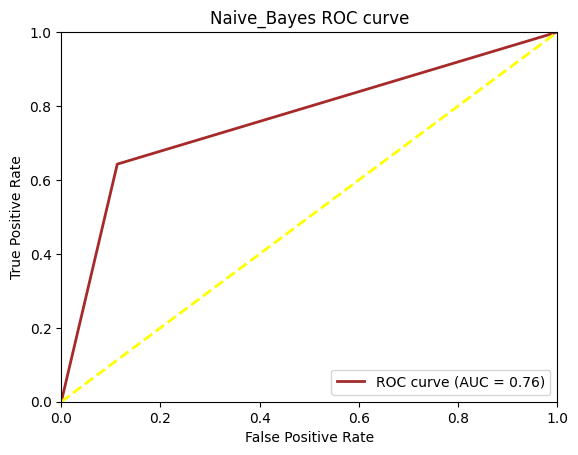

In [ ]:
plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive_Bayes ROC curve')
plt.legend(loc="lower right")
plt.show()